In [1]:
# 导入
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix

In [3]:
# 读取数据
# df = pd.read_excel("222.xlsx")
df = pd.read_csv("./data/error/2001.csv", index_col=0) #M101 test , index_col=0
df.head()

,日期,时间,生产线编号,物料推送气缸推送状态,物料推送气缸收回状态,物料推送数,物料待抓取数,放置容器数,容器上传检测数,填装检测数,...,不合格数,物料推送装置故障1001,物料检测装置故障2001,填装装置检测故障4001,填装装置定位故障4002,填装装置填装故障4003,加盖装置定位故障5001,加盖装置加盖故障5002,拧盖装置定位故障6001,拧盖装置拧盖故障6002
1169722,57,11969,M101,1,0,1764,1758,598,597,586,...,9,0,2001,0,0,0,0,0,0,0
1169723,57,11970,M101,0,1,1764,1758,598,597,587,...,9,0,2001,0,0,0,0,0,0,0
1169724,57,11971,M101,0,1,1764,1758,598,597,587,...,9,0,2001,0,0,0,0,0,0,0
1169725,57,11972,M101,0,1,1764,1758,598,597,587,...,9,0,2001,0,0,0,0,0,0,0
1169726,57,11973,M101,0,1,1764,1758,598,597,587,...,9,0,2001,0,0,0,0,0,0,0


In [4]:
df = df.drop(['生产线编号'], axis=1)
df.set_index('时间', inplace=True)

In [5]:
n = len(df.columns)

# 选择倒数前九列
dfx = df.iloc[:, :n-9]

# df_trimmed 现在包含了 df 的倒数前九列的内容
dfx

,日期,物料推送气缸推送状态,物料推送气缸收回状态,物料推送数,物料待抓取数,放置容器数,容器上传检测数,填装检测数,填装定位器固定状态,填装定位器放开状态,...,推盖数,加盖下降数,加盖数,拧盖检测数,拧盖定位数,拧盖下降数,拧盖旋转数,拧盖数,合格数,不合格数
时间,,,,,,,,,,,,,,,,,,,,,
11969,57,1,0,1764,1758,598,597,586,0,1,...,595,595,595,594,594,594,594,594,584,9
11970,57,0,1,1764,1758,598,597,587,1,0,...,595,595,595,594,594,594,594,594,584,9
11971,57,0,1,1764,1758,598,597,587,1,0,...,595,595,595,594,594,594,594,594,584,9
11972,57,0,1,1764,1758,598,597,587,1,0,...,595,595,595,594,594,594,594,594,584,9
11973,57,0,1,1764,1758,598,597,587,1,0,...,595,595,595,594,594,594,594,594,584,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,73,0,1,768,768,258,257,256,1,0,...,255,254,254,253,253,253,253,253,252,0
28486,25,0,1,4443,4443,1482,1481,1480,0,1,...,1479,1479,1479,1478,1478,1478,1478,1478,1476,0
11406,277,0,1,1768,1767,591,590,589,1,0,...,587,587,587,586,586,586,586,586,585,0


In [6]:
# 将特定列中所有不等于 0 的值替换为 1
df['物料检测装置故障2001'] = (df['物料检测装置故障2001'] != 0).astype(int)
df['物料检测装置故障2001'].value_counts()

物料检测装置故障2001
1    23254
0    23254
Name: count, dtype: int64

In [7]:
X=dfx
y=df['物料检测装置故障2001']
# 划分训练集和测试集

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# 特征缩放
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 初始化梯度提升分类器并设置超参数
gbdt = GradientBoostingClassifier(
    n_estimators=200,  # 提升阶段（树）的数量
    learning_rate=0.1,  # 防止过拟合的步长缩减
    max_depth=15,  # 每棵树的最大深度
    min_samples_split=50,  # 分裂内部节点所需的最小样本数
    min_samples_leaf=10,  # 在叶节点处所需的最小样本数
    subsample=0.6,  # 用于拟合树的样本比例
    random_state=42  # 用于可重现性的随机种子
)

# 将模型拟合到训练数据
gbdt.fit(X_train, y_train)

# 在测试数据上进行预测
y_pred = gbdt.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

# 打印准确率和超参数
print(f"准确率: {accuracy:.4f}")
 

准确率: 0.9948


混淆矩阵:
[[6968   21]
 [  51 6913]]


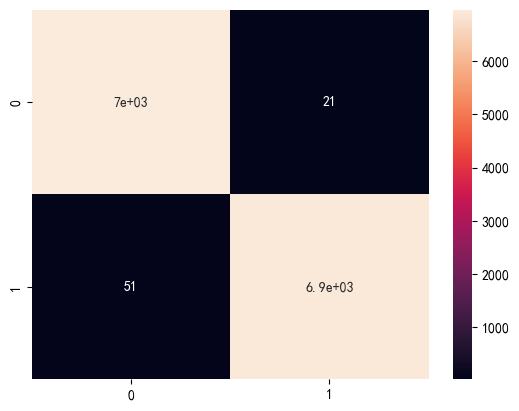

分类报告:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6989
           1       1.00      0.99      0.99      6964

    accuracy                           0.99     13953
   macro avg       0.99      0.99      0.99     13953
weighted avg       0.99      0.99      0.99     13953



In [14]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 预测测试集结果
y_pred = gbdt.predict(X_test)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("混淆矩阵:")
print(conf_matrix)

# 可视化混淆矩阵
sns.heatmap(conf_matrix, annot=True)
plt.show()

# 计算分类报告，包括召回率和F1分数
class_report = classification_report(y_test, y_pred)
print("分类报告:")
print(class_report)


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix, recall_score, f1_score
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, classification_report


# # 特征缩放
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # 建立SVM模型
# model = SVC(kernel='linear',C=100)#SVC(kernel='rbf',class_weight='balanced',gamma=5,C=100)
# model.fit(X_train, y_train)